In [1]:
# First we need to import all the necessary toolboxes...
from scipy.optimize import fsolve 
from scipy.interpolate import interp1d
# import all the standard math functions and plotting stuff we'd want from numpy and matplotlib
from numpy import*
import matplotlib.pyplot as plt
# This makes the plots appear inside the notebook
%matplotlib inline 
import pandas as pd

# Chapter 5 Transient Wire example
A long wire of diameter D = 1 mm is submerged in an oil bath of temperature $T_\infty$ = 25$^oC$. The wire has an electrical resistance per unit length of $R'_e$ = 0.01 $\Omega$/m. If a current of I = 100 A flows through the wire and the convection coefficient is h = 500 W/m$^2$K, what is the steady-state temperature of the wire? From the time the current is applied, how long does it take for the wire to reach a temperature that is within 1$^oC$ of the steady-state value? The properties of the wire are $\rho$ = 8000 kg/m$^3$, c = 500 J/kgK, and k = 20 W/mK.

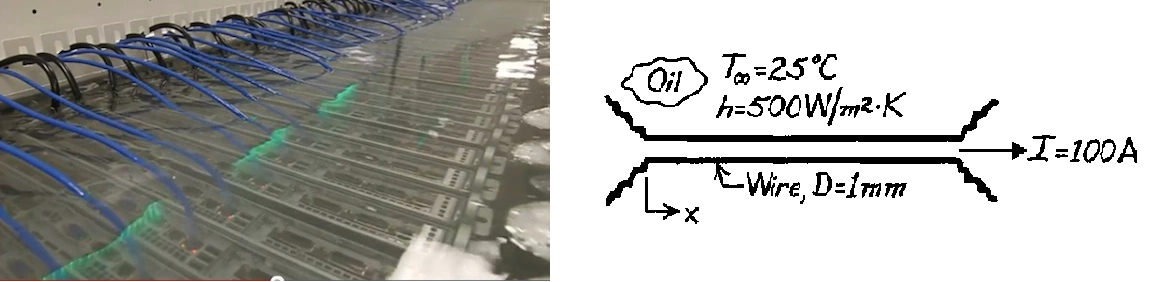

### Assumptions:
- symmetrical about the central axis
- constant properties (i.e., $k$'s)
- wire temp is independent of the x position

### Analysis:
First, we want to check the Biot number to see if we can use the lumped-capacitance method:

$$
Bi_L = \frac{hL_c}{k} = 0.0063 << 0.1
$$

where $L_c$ = r/2

Since the Bi is less than 0.1, we can use lumped capacitance, but we need to use the general method due to the presence of internal energy generation.

The resulting temperature solution is:

$$
T(t) - 273 = T_\infty + (T_i - T_\infty) * \exp(-a * t) + (b / a) * \left(1 - \exp(-a * t)\right)
$$

where $a = (h * A_s) / (\rho * c * Vol)$, and $b = (q''_s * A_s + I^2 * R_w) / (\rho * c * Vol)$


The Biot Number is 0.0063 which is << 1
The steady-state solution is 88.66 C


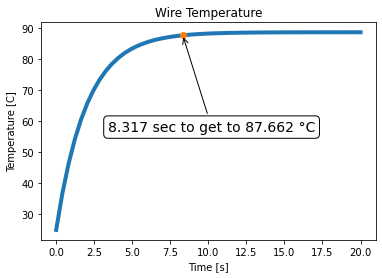

In [12]:
# Wire Properties
D = 0.001 # [m]
rho = 8000 # [kg/m3]
c = 500 # [J/kgK]
k = 20 # [W/mK]
As = pi * D # [m2] actually pi*D*L, but we're assuming unit length
Vol = pi * D ** 2 / 4

Rw = 0.01 # [ohms/m] - wire resistance per unit length
I = 100 # [A] - current through wire

# Oil Properties
h = 500 # [W/m2K]
T_inf = 25 + 273 # [K]
T_i = T_inf # here we're assuming the wire starts at the same temp as the oil

# Constants
a = (h * As) / (rho * c * Vol) # constant, a
qs = 0 # surface heat flux
b = (qs * As + I ** 2 * Rw) / (rho * c * Vol) # constant, b

# Biot Number
Lc = D/4
Bi = h*Lc/k
print(f'The Biot Number is {Bi:0.4f} which is << 1')

# Temperature Function
t = linspace(0, 20) # time space

Temp = (T_inf + (T_i - T_inf) * exp(-a * t) + (b / a) * (1 - exp(-a * t))) - 273
T_ss = (I ** 2 * Rw) / (h * As) + T_inf - 273 # steady state soln
print(f'The steady-state solution is {T_ss:0.2f} C')
T_max = max(Temp) # maximum value of Temperature

T_spec = T_ss - 1 # temp spec: T_s.s. - 1 degC
t_close = interp(T_spec, Temp, t) # time at T_spec

# Plotting
fig, ax = plt.subplots()
ax.plot(t, Temp, linewidth=4) # plots Temp function
ax.plot(t_close, T_spec, 'o', linewidth=5) # plots target time/Temp
ax.set_title('Wire Temperature')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Temperature [C]')

# Annotation box showing detail on solution point
dim = [0.5, 0.5, 0.3, 0.3]
str = f"{t_close:.3f} sec to get to {T_spec:.3f} °C"
ax.annotate(str, xy=(t_close, T_spec), xytext=(0.2, 0.5), textcoords="axes fraction",
            arrowprops=dict(facecolor='black', arrowstyle="->"), fontsize=14,
            bbox=dict(boxstyle="round", fc="w"))
plt.show()
